# Data Exploration

## Palm Images

In [1]:
import glob
import cv2
import numpy as np


In [ ]:
root_path = "/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara.id/data/train/"
ori_image_path = glob.glob(root_path + "images/*.jpg")
ori_label_path = glob.glob(root_path + "labels/*.txt")
ori_image_path.sort()
ori_label_path.sort()
len(ori_image_path), len(ori_label_path), ori_image_path[:10], ori_label_path[:10]


In [11]:
# Function to read YOLO bounding boxes from a .txt file
def read_yolo_boxes(file_path):
    boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            class_id, center_x, center_y, width, height = map(float, line.strip().split())
            boxes.append([class_id, center_x, center_y, width, height])
    return boxes

In [ ]:
# find the maximum number of labels in a single image

def count_boxes(boxes):
    return len(boxes)


max_labels = 0

for i in ori_label_path:
    yolo_boxes = read_yolo_boxes(i)
    if count_boxes(yolo_boxes) > max_labels:
        max_labels = count_boxes(yolo_boxes)
        
max_labels

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from typing import Literal


def plot_image(status: Literal['original', 'resized']):
    # Create figure with subplots in a row
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"{status} Images with YOLO Bounding Boxes")

    for i in range(3):
        print(ori_image_path[i])
        image = cv2.imread(ori_image_path[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        if status == 'resized':
            image = cv2.resize(image, (256, 256))
        
        height, width, _ = image.shape
        axes[i].imshow(image)
        axes[i].axis('off')
        
        # Read YOLO bounding boxes from .txt file
        yolo_boxes = read_yolo_boxes(ori_label_path[i])
        axes[i].set_title(f'Image {i+1} _ {len(yolo_boxes)} boxes')
        
        # Convert normalized coordinates to pixel coordinates and add rectangles
        for box_idx, box in enumerate(yolo_boxes, 1):
            class_id, x_center, y_center, w, h = box
            
            # Convert normalized coordinates to pixel coordinates
            x_center = int(x_center * width)
            y_center = int(y_center * height)
            w = int(w * width)
            h = int(h * height)
            
            # Calculate top-left corner from center coordinates
            x1 = int(x_center - w/2)
            y1 = int(y_center - h/2)
            
            # Draw rectangle
            rect = patches.Rectangle(
                (x1, y1), w, h,
                linewidth=2,
                edgecolor='r',
                facecolor='none'
            )
            axes[i].add_patch(rect)
            
            # Add count label
            # axes[i].text(x1, y1-5, f'#{box_idx}', 
            #             color='red', 
            #             fontsize=12, 
            #             bbox=dict(facecolor='white', alpha=0.7))

    plt.tight_layout()
    plt.show()

In [ ]:
plot_image(status='original')

In [ ]:
plot_image(status='resized')

## Apple Datasets

In [5]:
import glob
import cv2
import numpy as np

In [6]:
base_path = "/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/acfr-fruit-dataset"
# glob.glob("/train/***")

In [7]:
data_images = glob.glob(f"{base_path}/apples/images/*.png")
data_annotations = glob.glob(f"{base_path}/apples/annotations/*.csv")

len(data_images), len(data_annotations)

(1120, 1120)

In [8]:
data_images.sort()
data_annotations.sort()

data_images[0], data_annotations[0]

('/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/acfr-fruit-dataset/apples/images/20130320T004348.182606.Cam6_54.png',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/acfr-fruit-dataset/apples/annotations/20130320T004348.182606.Cam6_54.csv')

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_apple(img_path, csv_path):

    # Read the CSV file
    df = pd.read_csv(csv_path)

    # Load the image
    image = Image.open(img_path)

    # Create a plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Add rectangle boxes
    for index, row in df.iterrows():
        rect = patches.Rectangle((row['c-x'] - row['radius'], row['c-y'] - row['radius']),
                                2 * row['radius'], 2 * row['radius'],
                                linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.annotate(f"Item {row['#item']}", (row['c-x'], row['c-y']), color='white', fontsize=8, ha='center')

    # Show the plot
    plt.show()

In [10]:
df = pd.read_csv(data_annotations[12])

for row in df.iterrows():
    print(row)
# df = pd.read_csv("/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/acfr-fruit-dataset/apples/annotations/20130320T013250.719271_31.csv")
# df, len(df.values), data_images[0], data_annotations[0]

(0, #item       0.00
c-x       278.12
c-y        48.12
radius     11.89
label       1.00
Name: 0, dtype: float64)


In [11]:
for index in range(len(data_annotations)):
    df = pd.read_csv(data_annotations[index])
    if len(df.values) > 0:
        print(index, len(df.values))
        # break

6 6
7 4
8 6
9 5
11 2
12 1
14 1
18 1
19 3
21 7
22 8
23 2
24 2
25 1
26 1
27 7
28 1
29 6
31 2
32 2
34 2
36 1
37 2
38 4
39 2
41 2
42 1
43 6
44 2
46 1
47 4
48 3
49 6
50 6
51 4
52 2
55 2
56 3
58 3
59 2
60 1
61 2
62 2
63 4
64 2
65 3
67 4
68 6
69 5
70 3
71 2
72 4
73 1
74 4
75 13
76 3
77 6
78 7
79 3
80 2
82 1
83 4
84 3
86 4
87 5
88 3
89 5
90 6
93 1
94 3
95 1
99 2
100 4
101 1
104 2
105 5
106 3
109 1
111 3
113 1
114 1
115 1
116 5
117 1
118 4
119 1
120 11
121 9
122 13
123 6
131 3
132 2
133 2
134 13
135 14
136 8
138 1
139 3
140 1
141 6
142 2
143 5
144 7
145 4
146 2
147 4
148 3
149 2
150 5
151 4
152 6
153 1
154 9
156 1
158 1
159 7
160 5
161 6
162 9
163 9
164 4
165 7
166 2
167 7
168 6
169 9
170 8
171 3
172 6
173 8
174 4
175 8
176 2
177 1
178 5
179 2
180 11
181 13
182 7
183 13
184 7
185 14
186 9
187 3
188 13
189 10
190 13
191 10
192 13
193 9
194 5
195 10
196 12
197 12
198 10
199 18
200 5
201 9
202 5
203 3
204 13
205 9
206 2
207 5
208 7
209 8
210 7
211 2
212 7
213 1
214 5
215 9
216 5
217 10
218 9
219 5

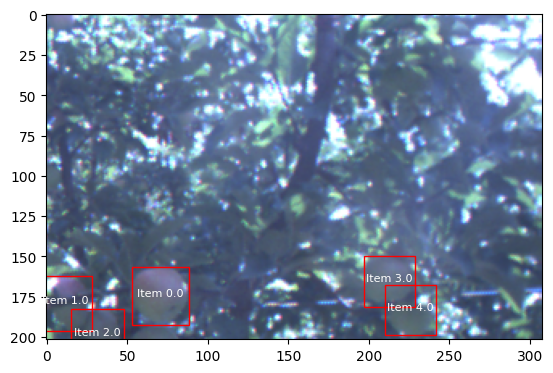

(None,
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/acfr-fruit-dataset/apples/annotations/20130320T013717.962834_44.csv')

In [15]:
visualize_apple(img_path=data_images[1119], csv_path=data_annotations[1119]), data_annotations[1119]

In [16]:
# convert csv into yolov11 format
df = pd.read_csv(data_annotations[1119])

df.keys()
# for row in df.iterrows():
#     print(row)

Index(['#item', 'c-x', 'c-y', 'radius', 'label'], dtype='object')

In [17]:
import os 

def convert_to_yolo_format(csv_file, output_dir, image_width, image_height):
    # Read the CSV file
    df = pd.read_csv(csv_file)
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Prepare the YOLO format data
    yolo_data = []
    for index, row in df.iterrows():
        class_id = row['label']
        x_center = row['c-x'] / image_width
        y_center = row['c-y'] / image_height
        width = (row['radius'] * 2) / image_width
        height = (row['radius'] * 2) / image_height
        
        yolo_format = f"{class_id} {x_center} {y_center} {width} {height}\n"
        yolo_data.append(yolo_format)
    
    # Save to a new file
    base_filename = os.path.basename(csv_file).split('.')[0]
    yolo_filename = os.path.join(output_dir, f"{base_filename}.txt")
    with open(yolo_filename, 'w') as f:
        f.writelines(yolo_data)

In [19]:
# data_images[1119], data_annotations[1119]
import cv2

image = cv2.imread(data_images[1119])
image.shape


(202, 308, 3)

## Apple New

In [3]:
import glob

base_path = "/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify"

In [4]:
glob.glob(f"{base_path}/*")

['/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/README.roboflow.txt',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/valid',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/README.dataset.txt',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/test',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/data.yaml',
 '/Users/sadewawicak/Researchs/Dinusantara/palm.dinusantara/data_classify/train']

In [5]:
len(glob.glob(f"{base_path}/train/labels/*")), len(glob.glob(f"{base_path}/train/labels/*"))

(3777, 3777)

In [6]:
len(glob.glob(f"{base_path}/valid/labels/*")), len(glob.glob(f"{base_path}/valid/labels/*"))

(396, 396)

In [7]:
len(glob.glob(f"{base_path}/test/labels/*")), len(glob.glob(f"{base_path}/test/labels/*"))

(199, 199)